## HEART ATTACK PREDICTION

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## importing csv file 

In [6]:
df=pd.read_csv('Cardiovascular_Disease_Dataset.csv')

In [7]:
df

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,103368,53,1,2,171,0,0,1,147,0,5.3,3,3,1
1,119250,40,1,0,94,229,0,1,115,0,3.7,1,1,0
2,119372,49,1,2,133,142,0,0,202,1,5.0,1,0,0
3,132514,43,1,0,138,295,1,1,153,0,3.2,2,2,1
4,146211,31,1,1,199,0,0,2,136,0,5.3,3,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,9949544,48,1,2,139,349,0,2,183,1,5.6,2,2,1
996,9953423,47,1,3,143,258,1,1,98,1,5.7,1,0,0
997,9965859,69,1,0,156,434,1,0,196,0,1.4,3,1,1
998,9988507,45,1,1,186,417,0,1,117,1,5.9,3,2,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   patientid          1000 non-null   int64  
 1   age                1000 non-null   int64  
 2   gender             1000 non-null   int64  
 3   chestpain          1000 non-null   int64  
 4   restingBP          1000 non-null   int64  
 5   serumcholestrol    1000 non-null   int64  
 6   fastingbloodsugar  1000 non-null   int64  
 7   restingrelectro    1000 non-null   int64  
 8   maxheartrate       1000 non-null   int64  
 9   exerciseangia      1000 non-null   int64  
 10  oldpeak            1000 non-null   float64
 11  slope              1000 non-null   int64  
 12  noofmajorvessels   1000 non-null   int64  
 13  target             1000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 109.5 KB


In [9]:
df_1=pd.read_csv('file1.csv')
df_1

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,148462,24,1,1,173,0,0,0,161,0,4.7,3,2,1
1,327110,24,0,0,136,164,0,0,91,1,1.8,1,1,0
2,448075,23,0,0,97,175,0,0,195,1,0.8,0,0,0
3,463851,20,1,0,199,248,0,0,86,1,3.2,0,0,0
4,631691,22,1,0,126,296,0,1,175,0,4.3,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,9403337,23,1,2,155,558,0,0,139,0,5.3,2,2,1
96,9559845,20,1,1,170,352,1,0,138,0,1.4,1,0,1
97,9626182,24,1,2,183,513,1,2,155,0,2.1,2,1,1
98,9791031,20,0,0,136,259,0,0,93,1,2.3,1,1,0


In [10]:
df_2=pd.read_csv('file2.csv')
df_2

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,119250,40,1,0,94,229,0,1,115,0,3.7,1,1,0
1,119372,49,1,2,133,142,0,0,202,1,5.0,1,0,0
2,132514,43,1,0,138,295,1,1,153,0,3.2,2,2,1
3,146211,31,1,1,199,0,0,2,136,0,5.3,3,2,1
4,223295,27,1,0,129,135,0,1,192,1,1.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417,9921653,25,0,1,197,0,0,0,195,0,1.0,3,0,1
418,9949544,48,1,2,139,349,0,2,183,1,5.6,2,2,1
419,9953423,47,1,3,143,258,1,1,98,1,5.7,1,0,0
420,9988507,45,1,1,186,417,0,1,117,1,5.9,3,2,1


In [11]:
df_3=pd.read_csv('file3.csv')
df_3

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,103368,53,1,2,171,0,0,1,147,0,5.3,3,3,1
1,170498,52,1,0,127,345,0,0,192,1,4.9,1,0,0
2,188225,62,1,0,121,357,0,1,138,0,2.8,0,0,0
3,192523,61,0,0,190,181,0,1,150,0,2.9,2,0,1
4,201030,59,0,1,190,529,1,1,151,1,3.2,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409,9870657,74,1,0,136,279,0,1,122,0,1.2,0,0,0
410,9876043,56,0,0,142,230,0,1,188,1,1.4,1,2,0
411,9888918,63,0,1,196,367,0,2,96,1,3.2,2,0,1
412,9937998,62,1,1,125,342,0,0,128,1,2.1,0,0,0


In [12]:
df_4=pd.read_csv('file4.csv')
df_4

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,168686,79,1,2,130,240,0,2,157,0,2.5,2,1,1
1,478864,78,0,0,186,404,1,2,195,1,2.7,2,3,1
2,539147,75,1,0,126,357,0,0,127,1,5.5,1,1,0
3,669013,77,1,1,125,135,0,0,100,0,1.8,0,1,0
4,701164,79,0,0,186,211,0,2,97,1,1.7,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,9480725,75,1,0,122,231,0,0,176,1,2.5,1,0,0
87,9657376,78,1,1,97,319,0,0,117,1,0.7,1,0,0
88,9661522,80,1,1,199,212,0,1,113,0,0.6,1,0,1
89,9740359,77,1,0,196,354,0,0,99,1,1.1,1,2,0


In [13]:
df_2.drop('patientid',axis=1,inplace=True)
df_3.drop('patientid',axis=1,inplace=True)
df_4.drop('patientid',axis=1,inplace=True)

In [14]:
dfc=df.copy()

In [15]:
df.drop('patientid',axis=1,inplace=True)

In [16]:
df_1.drop('patientid',axis=1,inplace=True)

In [17]:
df_1

,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,24,1,1,173,0,0,0,161,0,4.7,3,2,1
1,24,0,0,136,164,0,0,91,1,1.8,1,1,0
2,23,0,0,97,175,0,0,195,1,0.8,0,0,0
3,20,1,0,199,248,0,0,86,1,3.2,0,0,0
4,22,1,0,126,296,0,1,175,0,4.3,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,23,1,2,155,558,0,0,139,0,5.3,2,2,1
96,20,1,1,170,352,1,0,138,0,1.4,1,0,1
97,24,1,2,183,513,1,2,155,0,2.1,2,1,1
98,20,0,0,136,259,0,0,93,1,2.3,1,1,0


## Treating of outliers

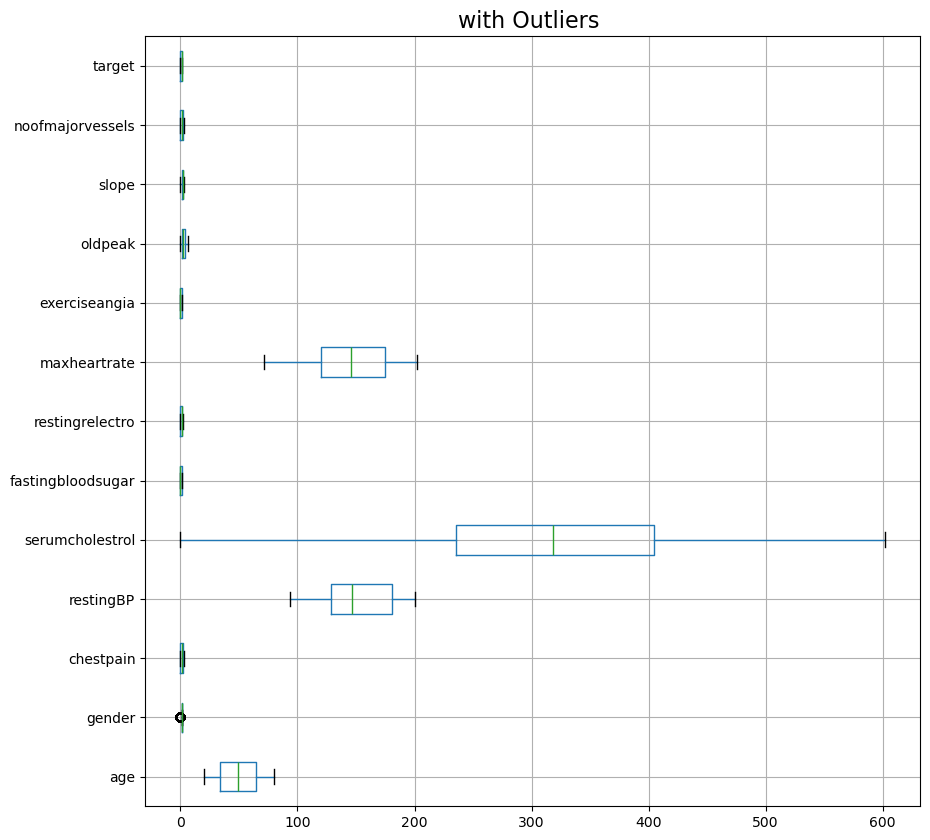

In [18]:
cont=df.dtypes[(df.dtypes!="uint8") &(df.dtypes != 'bool')].index
plt.figure(figsize=(10,10))
df[cont].boxplot(vert=0)
plt.title('with Outliers ',fontsize=16)
plt.show()

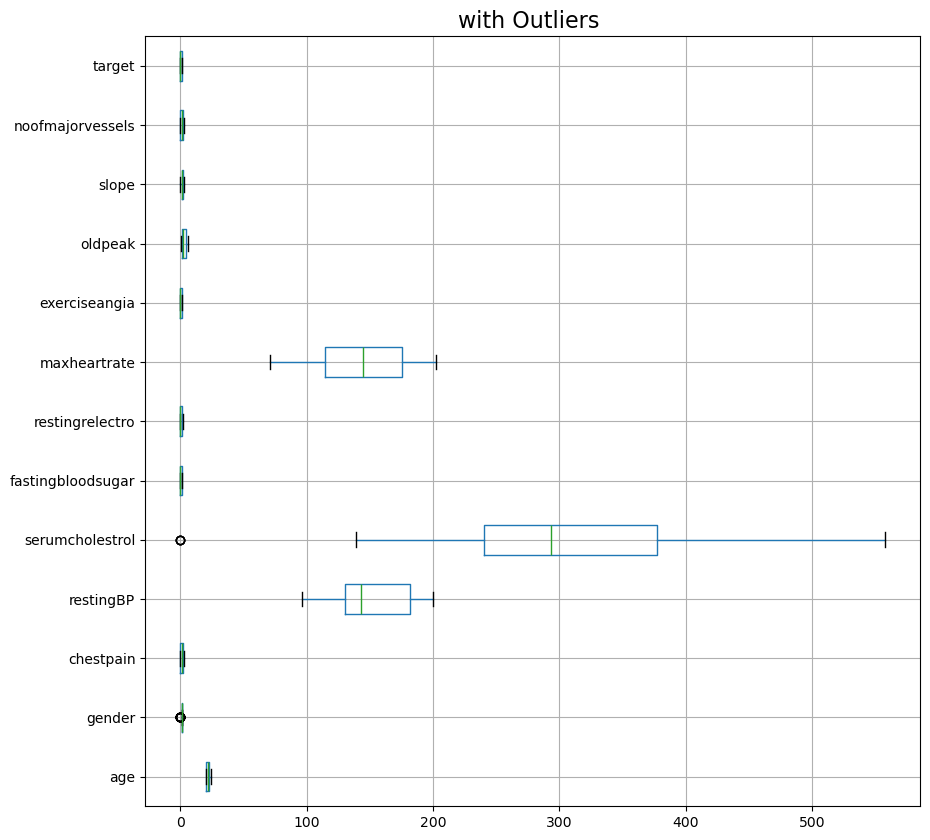

In [19]:
cont=df_1.dtypes[(df_1.dtypes!="uint8") &(df_1.dtypes != 'bool')].index
plt.figure(figsize=(10,10))
df_1[cont].boxplot(vert=0)
plt.title('with Outliers ',fontsize=16)
plt.show()

## Scaling the data to make it uniform

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:

# Define the column to exclude for scaling (replace with actual name)
column_to_exclude = "target"

# Select columns to scale (all except the excluded one)
rem_col = df.columns.difference([column_to_exclude])
features = df[rem_col]

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the features (calculate mean and standard deviation)
scaler.fit(features)

# Transform the features (scale by subtracting mean and dividing by standard deviation)
scaled_col = scaler.transform(features)

# Get the unscaled excluded column
unscaled_excluded_column = df[column_to_exclude]

# Combine the scaled features and unscaled excluded column
scaled_data = pd.concat([pd.DataFrame(scaled_col), unscaled_excluded_column], axis=1)

# Use the scaled_data for further analysis or modeling

In [22]:
import pandas as pd

In [23]:
t = pd.DataFrame(scaled_col)
c = unscaled_excluded_column

In [24]:
import statsmodels.api as sm 
t = sm.add_constant(t)
model1 = sm.OLS(c,t)
result1 = model1.fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     238.1
Date:                Sat, 13 Jul 2024   Prob (F-statistic):          2.25e-281
Time:                        22:28:32   Log-Likelihood:                -33.000
No. Observations:                1000   AIC:                             92.00
Df Residuals:                     987   BIC:                             155.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5800      0.008     72.860      0.0

In [25]:

# Define the column to exclude for scaling (replace with actual name)
column_to_exclude = "target"

# Select columns to scale (all except the excluded one)
rem_col = df_1.columns.difference([column_to_exclude])
features = df_1[rem_col]

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the features (calculate mean and standard deviation)
scaler.fit(features)

# Transform the features (scale by subtracting mean and dividing by standard deviation)
scaled_col = scaler.transform(features)

# Get the unscaled excluded column
unscaled_excluded_column = df_1[column_to_exclude]

# Combine the scaled features and unscaled excluded column
scaled_data = pd.concat([pd.DataFrame(scaled_col), unscaled_excluded_column], axis=1)

# Use the scaled_data for further analysis or modeling

In [26]:
t1 = pd.DataFrame(scaled_col)
c1 = unscaled_excluded_column

In [27]:
import statsmodels.api as sm 
t1 = sm.add_constant(t1)
model1 = sm.OLS(c1,t1)
result1 = model1.fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     25.02
Date:                Sat, 13 Jul 2024   Prob (F-statistic):           3.25e-23
Time:                        22:28:32   Log-Likelihood:                 2.3966
No. Observations:                 100   AIC:                             21.21
Df Residuals:                      87   BIC:                             55.07
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4600      0.025     18.162      0.0

In [28]:

# Define the column to exclude for scaling (replace with actual name)
column_to_exclude = "target"

# Select columns to scale (all except the excluded one)
rem_col = df_2.columns.difference([column_to_exclude])
features = df_2[rem_col]

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the features (calculate mean and standard deviation)
scaler.fit(features)

# Transform the features (scale by subtracting mean and dividing by standard deviation)
scaled_col = scaler.transform(features)

# Get the unscaled excluded column
unscaled_excluded_column = df_2[column_to_exclude]

# Combine the scaled features and unscaled excluded column
scaled_data = pd.concat([pd.DataFrame(scaled_col), unscaled_excluded_column], axis=1)

# Use the scaled_data for further analysis or modeling

In [29]:
t2 = pd.DataFrame(scaled_col)
c2 = unscaled_excluded_column

In [30]:
import statsmodels.api as sm 
t2 = sm.add_constant(t2)
model1 = sm.OLS(c2,t2)
result1 = model1.fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     91.71
Date:                Sat, 13 Jul 2024   Prob (F-statistic):          7.09e-108
Time:                        22:28:32   Log-Likelihood:                -19.546
No. Observations:                 422   AIC:                             65.09
Df Residuals:                     409   BIC:                             117.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6137      0.013     48.975      0.0

In [31]:

# Define the column to exclude for scaling (replace with actual name)
column_to_exclude = "target"

# Select columns to scale (all except the excluded one)
rem_col = df_3.columns.difference([column_to_exclude])
features = df_3[rem_col]

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the features (calculate mean and standard deviation)
scaler.fit(features)

# Transform the features (scale by subtracting mean and dividing by standard deviation)
scaled_col = scaler.transform(features)

# Get the unscaled excluded column
unscaled_excluded_column = df_3[column_to_exclude]

# Combine the scaled features and unscaled excluded column
scaled_data = pd.concat([pd.DataFrame(scaled_col), unscaled_excluded_column], axis=1)

# Use the scaled_data for further analysis or modeling

In [32]:
t3 = features
c3 = unscaled_excluded_column

In [33]:

t3 = sm.add_constant(t3)
model1 = sm.OLS(c3,t3)
result1 = model1.fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     112.3
Date:                Sat, 13 Jul 2024   Prob (F-statistic):          4.88e-120
Time:                        22:28:32   Log-Likelihood:                 11.795
No. Observations:                 414   AIC:                             2.410
Df Residuals:                     401   BIC:                             54.75
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.6640      0.13

In [34]:

# Define the column to exclude for scaling (replace with actual name)
column_to_exclude = "target"

# Select columns to scale (all except the excluded one)
rem_col = df_4.columns.difference([column_to_exclude])
features = df_4[rem_col]

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the features (calculate mean and standard deviation)
scaler.fit(features)

# Transform the features (scale by subtracting mean and dividing by standard deviation)
scaled_col = scaler.transform(features)

# Get the unscaled excluded column
unscaled_excluded_column = df_4[column_to_exclude]

# Combine the scaled features and unscaled excluded column
scaled_data = pd.concat([pd.DataFrame(scaled_col), unscaled_excluded_column], axis=1)

# Use the scaled_data for further analysis or modeling

In [35]:
t4 = features
c4 = unscaled_excluded_column

In [36]:
df_3

,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,53,1,2,171,0,0,1,147,0,5.3,3,3,1
1,52,1,0,127,345,0,0,192,1,4.9,1,0,0
2,62,1,0,121,357,0,1,138,0,2.8,0,0,0
3,61,0,0,190,181,0,1,150,0,2.9,2,0,1
4,59,0,1,190,529,1,1,151,1,3.2,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
409,74,1,0,136,279,0,1,122,0,1.2,0,0,0
410,56,0,0,142,230,0,1,188,1,1.4,1,2,0
411,63,0,1,196,367,0,2,96,1,3.2,2,0,1
412,62,1,1,125,342,0,0,128,1,2.1,0,0,0


In [37]:

t4 = sm.add_constant(t4)
model1 = sm.OLS(c4,t4)
result1 = model1.fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                     19.23
Date:                Sat, 13 Jul 2024   Prob (F-statistic):           1.32e-18
Time:                        22:28:33   Log-Likelihood:                -3.4009
No. Observations:                  91   AIC:                             32.80
Df Residuals:                      78   BIC:                             65.44
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -2.9852      1.49

C:\Users\ATUL SINGH\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ATUL SINGH\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ATUL SINGH\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ATUL SINGH\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to 

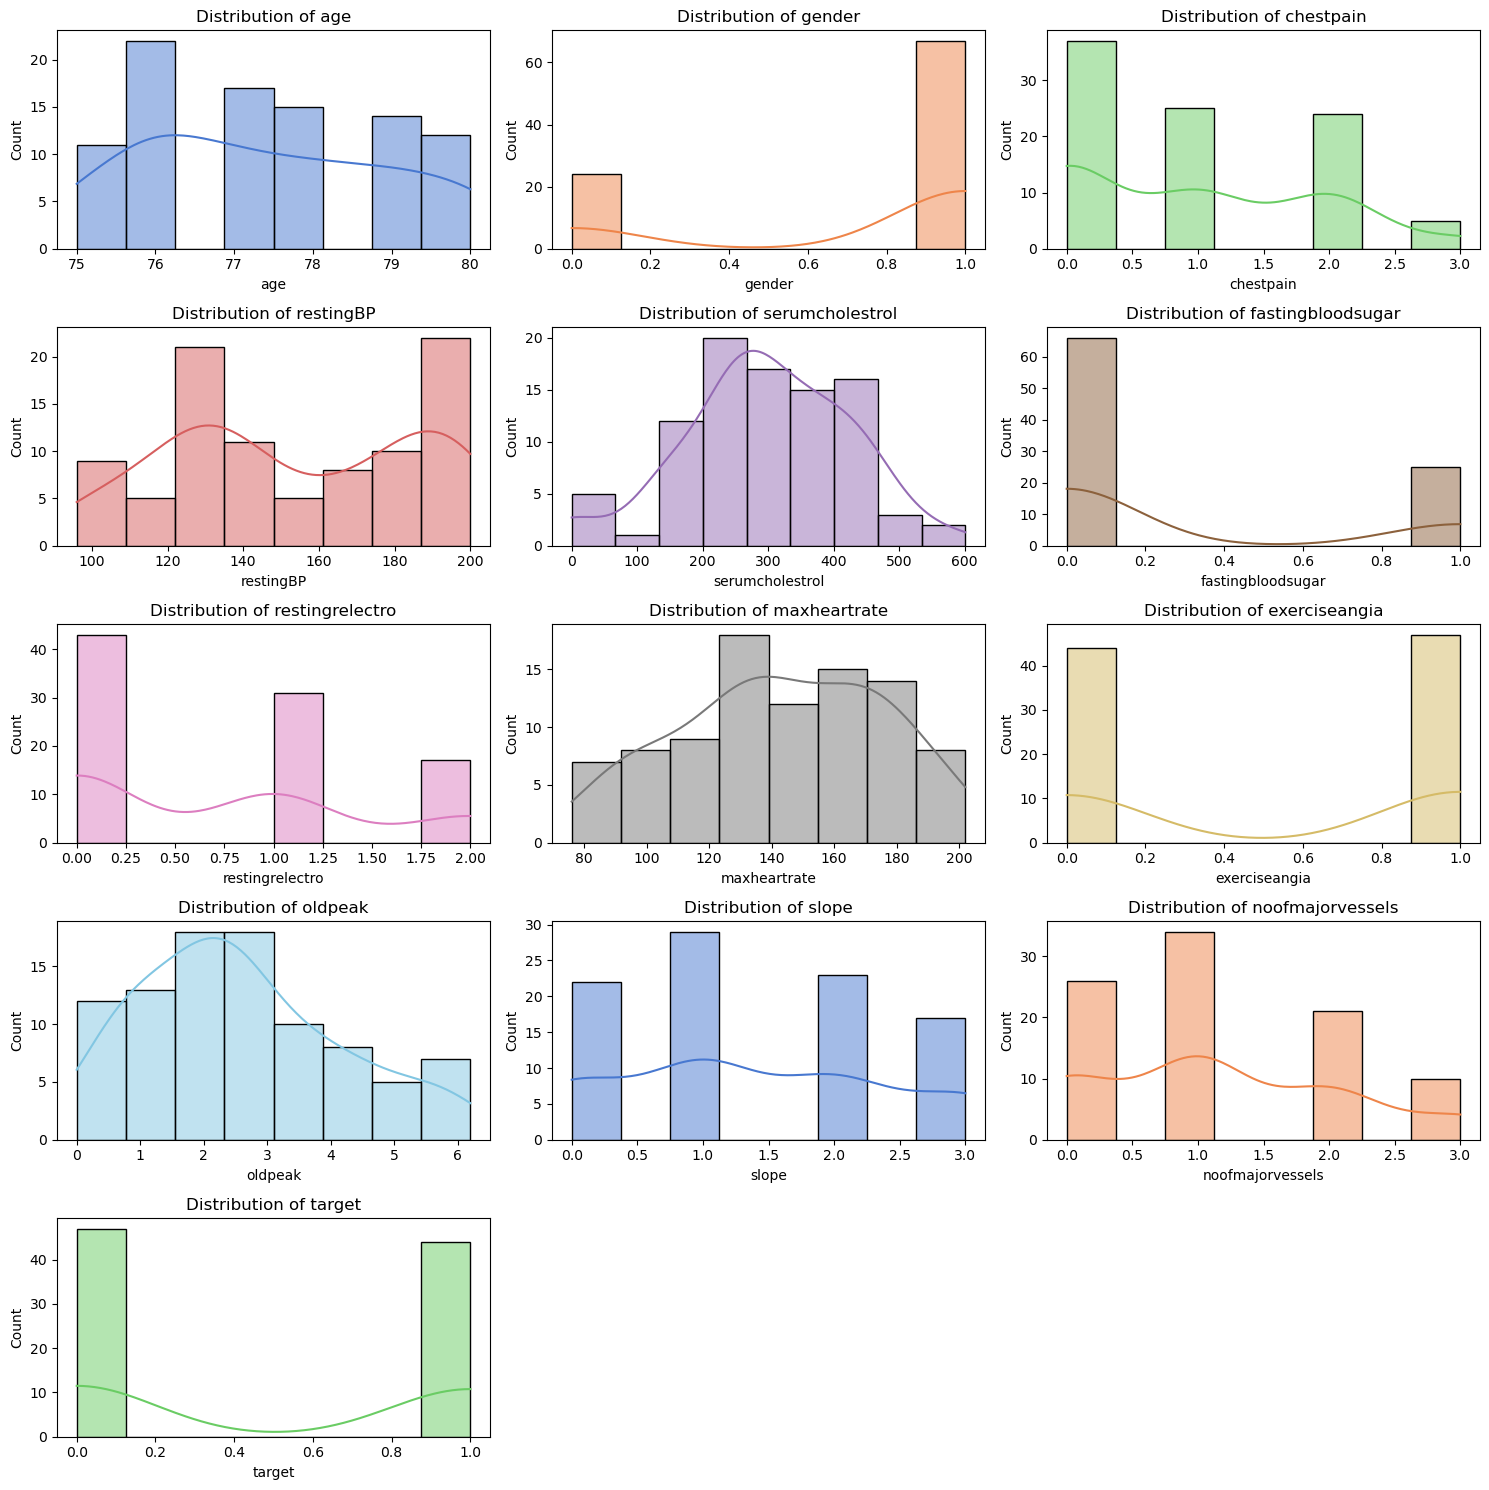

In [39]:
numeric_cols = df_4.select_dtypes(include=['float64', 'int64']).columns

num_cols = 3
num_features = len(numeric_cols)

fig, axes = plt.subplots(num_features // num_cols + 1, num_cols, figsize=(15, 15))
axes = axes.flatten()

colors = sns.color_palette('muted', num_features)

for i, (col, color) in enumerate(zip(numeric_cols, colors)):
    sns.histplot(df_4[col], kde=True, ax=axes[i], color=color)
    axes[i].set_title(f'Distribution of {col}')

for j in range(num_features, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

C:\Users\ATUL SINGH\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ATUL SINGH\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ATUL SINGH\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ATUL SINGH\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to 

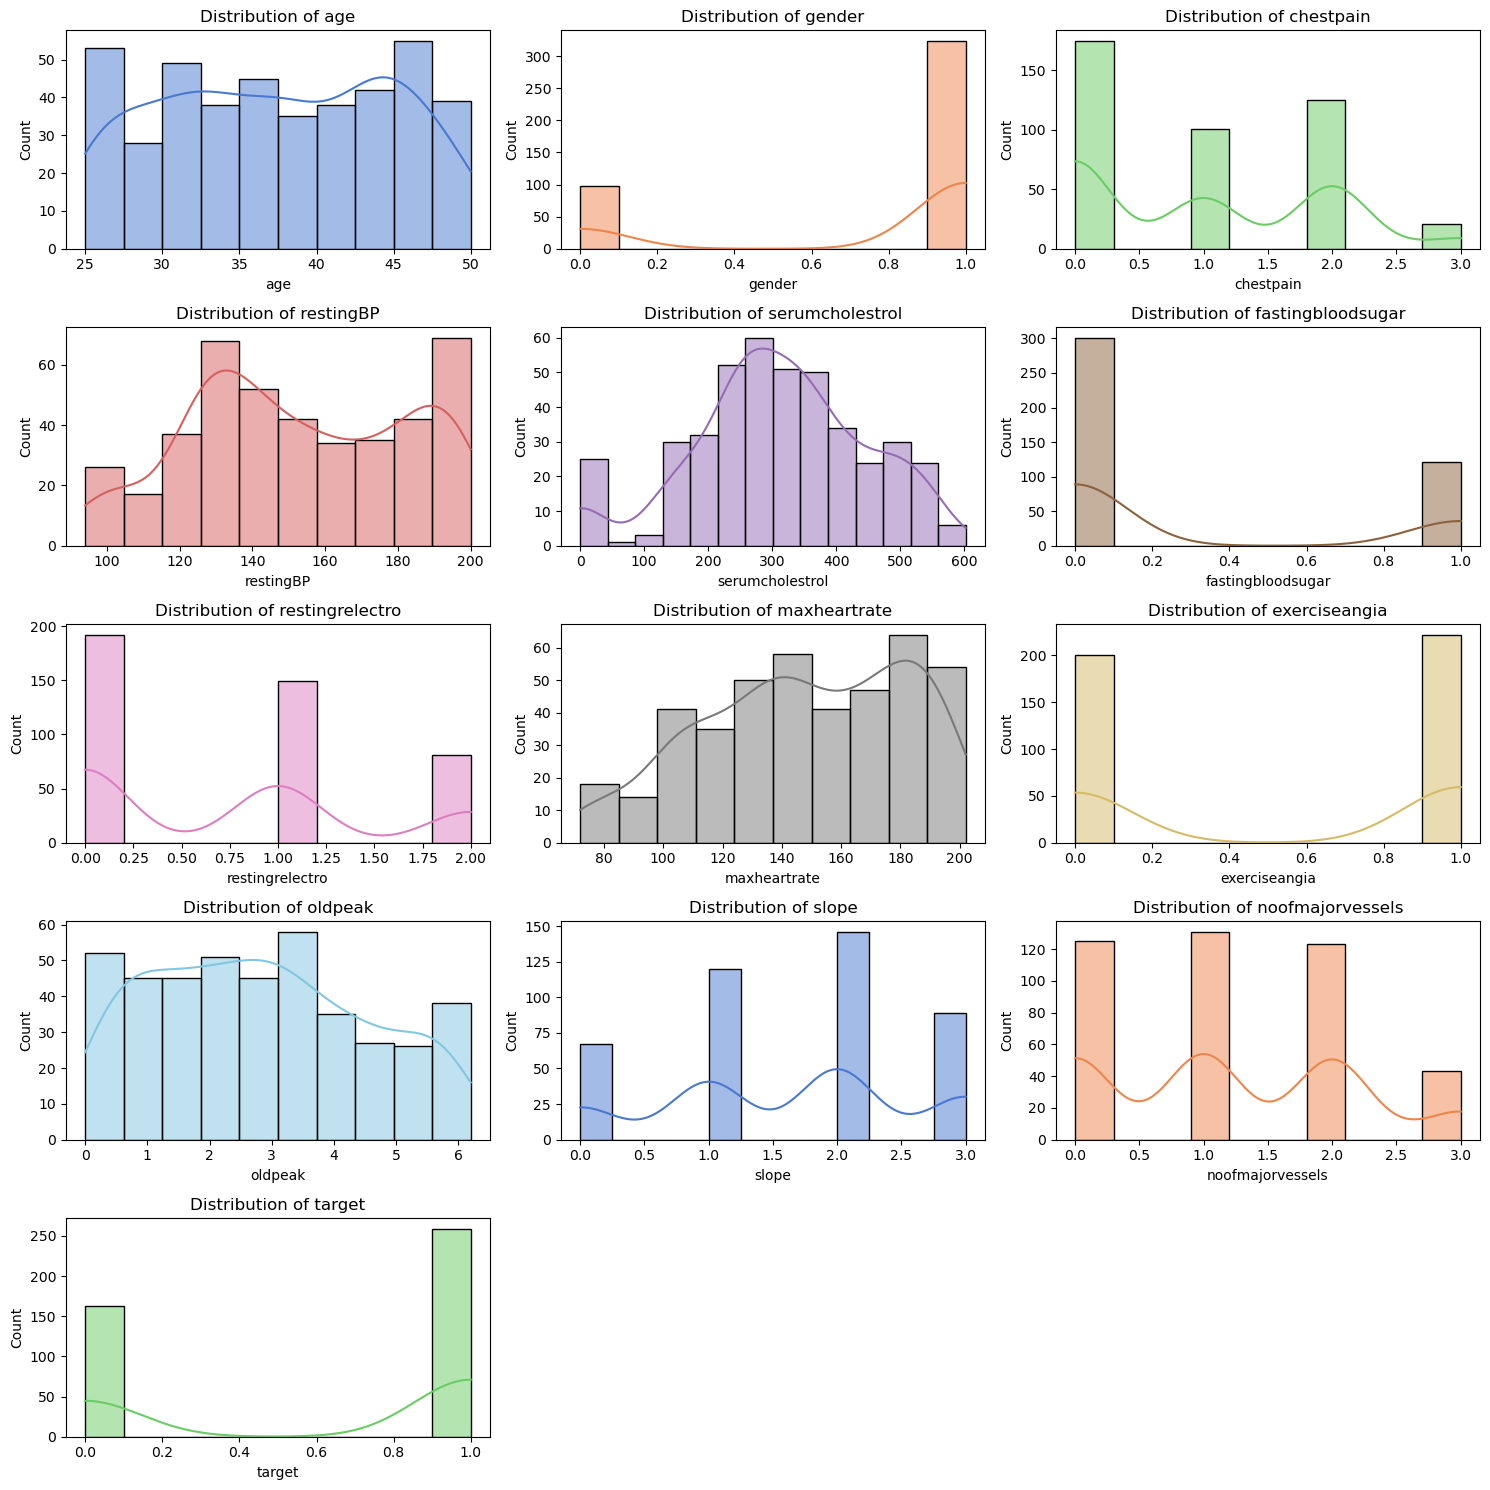

In [121]:
numeric_cols = df_2.select_dtypes(include=['float64', 'int64']).columns

num_cols = 3
num_features = len(numeric_cols)

fig, axes = plt.subplots(num_features // num_cols + 1, num_cols, figsize=(15, 15))
axes = axes.flatten()

colors = sns.color_palette('muted', num_features)

for i, (col, color) in enumerate(zip(numeric_cols, colors)):
    sns.histplot(df_2[col], kde=True, ax=axes[i], color=color)
    axes[i].set_title(f'Distribution of {col}')

for j in range(num_features, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

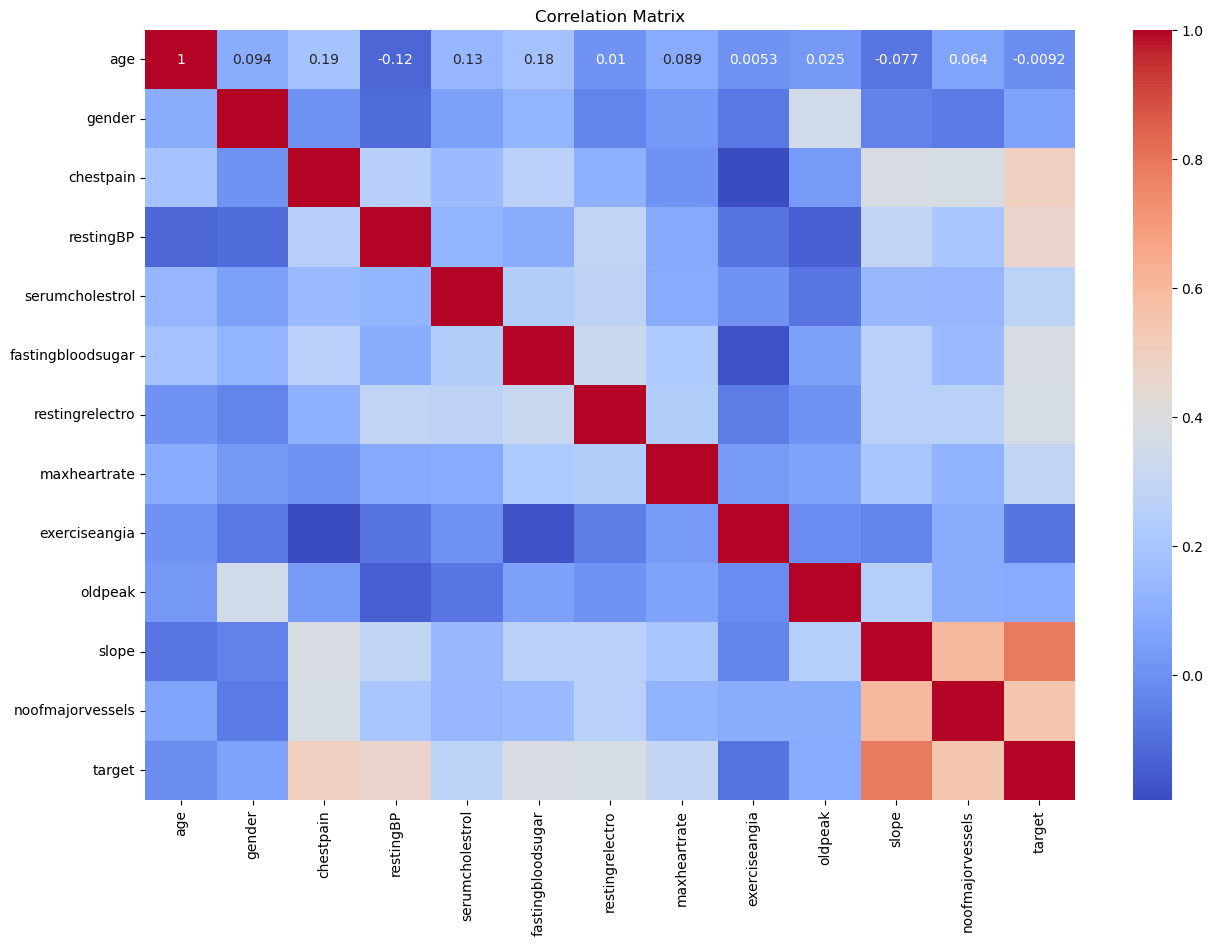

In [41]:
corr_matrix = df_1.corr()
fig, ax = plt.subplots(figsize=(15,10))    #size
sns.heatmap(corr_matrix, ax=ax, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


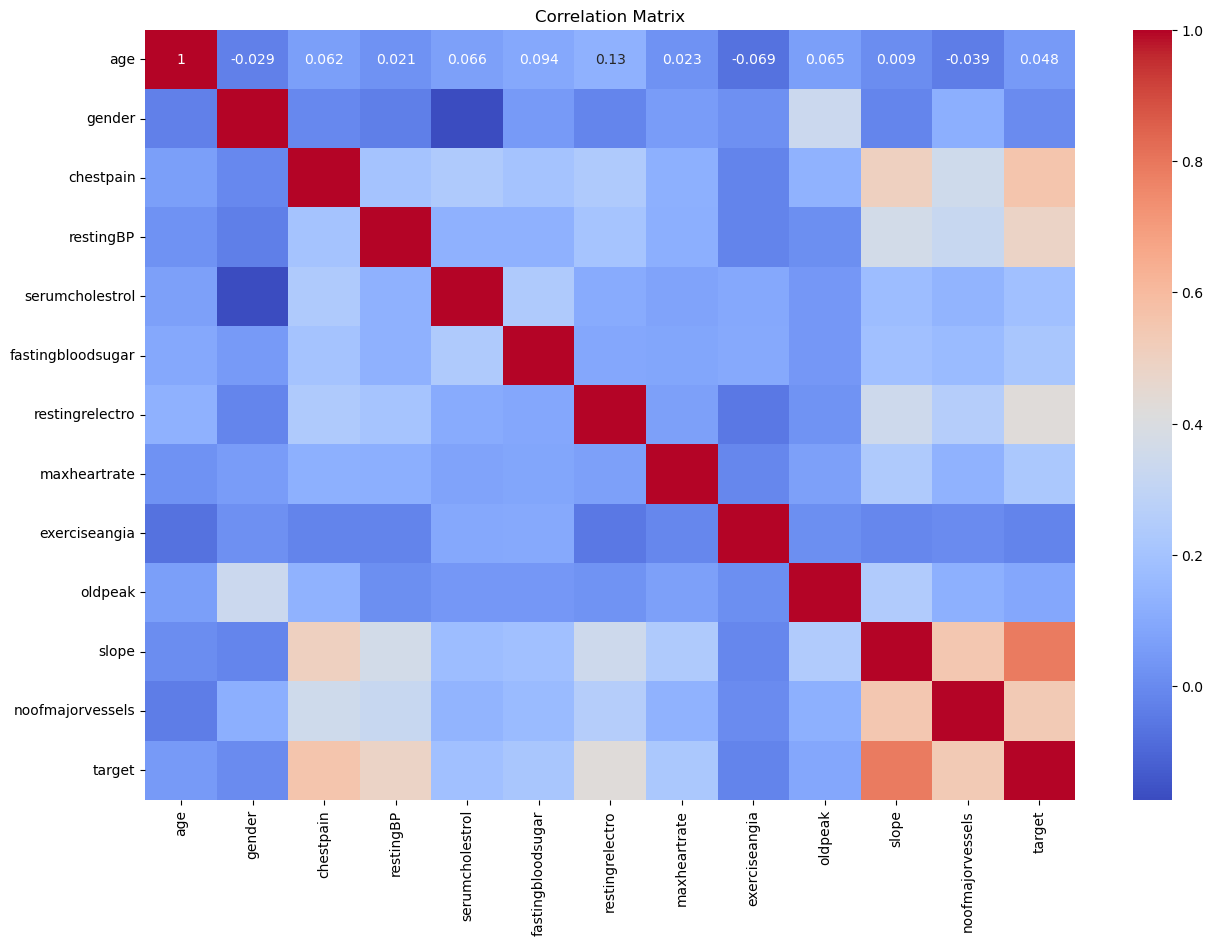

In [42]:
corr_matrix = df_2.corr()
fig, ax = plt.subplots(figsize=(15,10))    #size
sns.heatmap(corr_matrix, ax=ax, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [43]:
corr_matrix

,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
age,1.000000,-0.028992,0.061696,0.020818,0.065772,0.093681,0.125705,0.023360,-0.069142,0.064789,0.008955,-0.039212,0.047776
gender,-0.028992,1.000000,-0.005048,-0.034751,-0.173388,0.050873,-0.013122,0.053613,0.017471,0.336092,-0.013155,0.117726,0.001693
chestpain,0.061696,-0.005048,1.000000,0.198053,0.236163,0.199404,0.238288,0.120943,-0.018867,0.131552,0.504818,0.349713,0.555777
restingBP,0.020818,-0.034751,0.198053,1.000000,0.125226,0.127587,0.202603,0.119061,-0.018432,0.012789,0.364886,0.323077,0.483785
serumcholestrol,0.065772,-0.173388,0.236163,0.125226,1.000000,0.238250,0.101697,0.075707,0.094462,0.041215,0.174413,0.137010,0.186286
fastingbloodsugar,0.093681,0.050873,0.199404,0.127587,0.238250,1.000000,0.088427,0.085215,0.098078,0.039882,0.187145,0.165707,0.212409
restingrelectro,0.125705,-0.013122,0.238288,0.202603,0.101697,0.088427,1.000000,0.066218,-0.053738,0.026276,0.348762,0.255436,0.423411
maxheartrate,0.023360,0.053613,0.120943,0.119061,0.075707,0.085215,0.066218,1.000000,-0.009142,0.064970,0.235502,0.131763,0.225325
exerciseangia,-0.069142,0.017471,-0.018867,-0.018432,0.094462,0.098078,-0.053738,-0.009142,1.000000,0.013310,-0.010556,0.003934,-0.021943
oldpeak,0.064789,0.336092,0.131552,0.012789,0.041215,0.039882,0.026276,0.064970,0.013310,1.000000,0.241382,0.120956,0.091797


In [44]:
X= df_2.drop('target',axis = 1)
y = df_2['target']

In [45]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 422 entries, 0 to 421
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                422 non-null    int64  
 1   gender             422 non-null    int64  
 2   chestpain          422 non-null    int64  
 3   restingBP          422 non-null    int64  
 4   serumcholestrol    422 non-null    int64  
 5   fastingbloodsugar  422 non-null    int64  
 6   restingrelectro    422 non-null    int64  
 7   maxheartrate       422 non-null    int64  
 8   exerciseangia      422 non-null    int64  
 9   oldpeak            422 non-null    float64
 10  slope              422 non-null    int64  
 11  noofmajorvessels   422 non-null    int64  
 12  target             422 non-null    int64  
dtypes: float64(1), int64(12)
memory usage: 43.0 KB


In [46]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [47]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [48]:
NB_model = GaussianNB()
NB_model.fit(X_train,y_train)

GaussianNB()

In [49]:
y_train_predict = NB_model.predict(X_train)
model_score = NB_model.score(X_train,y_train)
print(model_score)
print()
print(metrics.confusion_matrix (y_train,y_train_predict) )
print(metrics.classification_report(y_train,y_train_predict))

0.9423728813559322

[[108  11]
 [  6 170]]
              precision    recall  f1-score   support

           0       0.95      0.91      0.93       119
           1       0.94      0.97      0.95       176

    accuracy                           0.94       295
   macro avg       0.94      0.94      0.94       295
weighted avg       0.94      0.94      0.94       295



Text(0.5, 1.0, 'CONFUSION MATRIX - CUT OFF (0.5)')

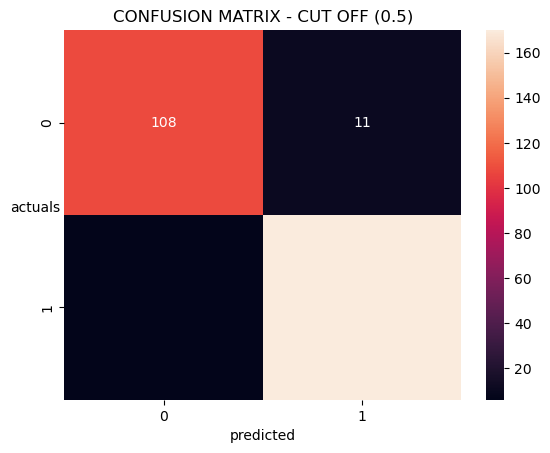

In [50]:
sns.heatmap((metrics.confusion_matrix(y_train,y_train_predict)),annot = True,fmt='.5g');
plt.xlabel('predicted'); 
plt.ylabel('actuals',rotation = 0);
plt.title('CONFUSION MATRIX - CUT OFF (0.5)')

In [51]:
y_test_predict = NB_model.predict(X_test)

Text(0.5, 1.0, 'CONFUSION MATRIX - CUT OFF (0.5)')

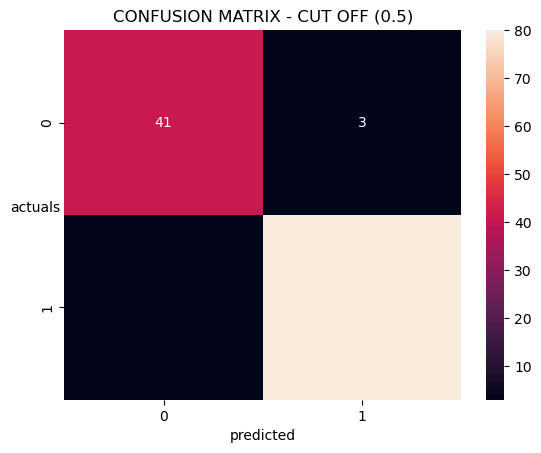

In [52]:
sns.heatmap((metrics.confusion_matrix(y_test,y_test_predict)),annot = True,fmt='.5g');
plt.xlabel('predicted'); 
plt.ylabel('actuals',rotation = 0);
plt.title('CONFUSION MATRIX - CUT OFF (0.5)')

In [53]:

print(metrics.classification_report(y_test,y_test_predict))


              precision    recall  f1-score   support

           0       0.93      0.93      0.93        44
           1       0.96      0.96      0.96        83

    accuracy                           0.95       127
   macro avg       0.95      0.95      0.95       127
weighted avg       0.95      0.95      0.95       127



In [54]:
print(metrics.confusion_matrix (y_test,y_test_predict) )

[[41  3]
 [ 3 80]]


#decision tree

In [55]:
from sklearn import tree
DT_model= tree.DecisionTreeClassifier()
DT_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [56]:
y_train_predict = DT_model.predict(X_train)
model_score = NB_model.score(X_train,y_train)
print(model_score)
print()
print(metrics.confusion_matrix (y_train,y_train_predict) )
print(metrics.classification_report(y_train,y_train_predict))

0.9423728813559322

[[119   0]
 [  0 176]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       119
           1       1.00      1.00      1.00       176

    accuracy                           1.00       295
   macro avg       1.00      1.00      1.00       295
weighted avg       1.00      1.00      1.00       295



Text(0.5, 1.0, 'CONFUSION MATRIX - CUT OFF (0.5)')

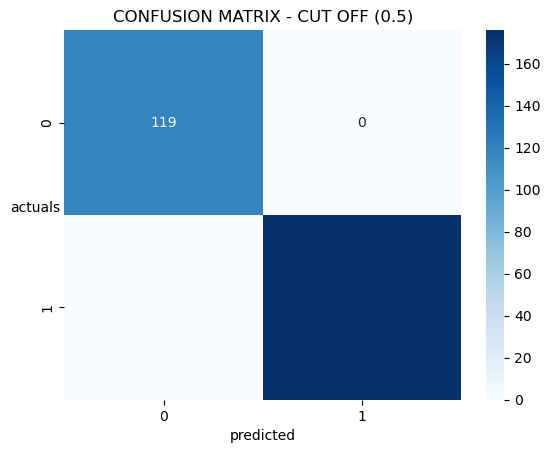

In [57]:
sns.heatmap((metrics.confusion_matrix(y_train,y_train_predict)),annot = True,fmt='.5g',cmap='Blues');
plt.xlabel('predicted'); 
plt.ylabel('actuals',rotation = 0);
plt.title('CONFUSION MATRIX - CUT OFF (0.5)')

In [58]:
y_test_predict = DT_model.predict(X_test)
model_score = NB_model.score(X_test,y_test)
print(model_score)
print()
print(metrics.confusion_matrix (y_test,y_test_predict) )
print(metrics.classification_report(y_test,y_test_predict))

0.952755905511811

[[42  2]
 [ 5 78]]
              precision    recall  f1-score   support

           0       0.89      0.95      0.92        44
           1       0.97      0.94      0.96        83

    accuracy                           0.94       127
   macro avg       0.93      0.95      0.94       127
weighted avg       0.95      0.94      0.95       127



In [59]:
from sklearn.ensemble import RandomForestClassifier
RF_model=RandomForestClassifier(n_estimators=100,random_state=1)
RF_model.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

In [60]:
y_train_predict = RF_model.predict(X_train)
model_score = RF_model.score(X_train,y_train)
print(model_score)
print()
print(metrics.confusion_matrix (y_train,y_train_predict) )
print(metrics.classification_report(y_train,y_train_predict))

1.0

[[119   0]
 [  0 176]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       119
           1       1.00      1.00      1.00       176

    accuracy                           1.00       295
   macro avg       1.00      1.00      1.00       295
weighted avg       1.00      1.00      1.00       295



In [61]:
y_test_predict = RF_model.predict(X_test)
model_score = RF_model.score(X_test,y_test)
print(model_score)
print()
print(metrics.confusion_matrix (y_test,y_test_predict) )
print(metrics.classification_report(y_test,y_test_predict))

0.968503937007874

[[43  1]
 [ 3 80]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.96        44
           1       0.99      0.96      0.98        83

    accuracy                           0.97       127
   macro avg       0.96      0.97      0.97       127
weighted avg       0.97      0.97      0.97       127



In [62]:
from sklearn.ensemble import AdaBoostClassifier
ADB_model=AdaBoostClassifier(n_estimators=100,random_state=1)
ADB_model.fit(X_train,y_train)


AdaBoostClassifier(n_estimators=100, random_state=1)

In [63]:
y_train_predict = ADB_model.predict(X_train)
model_score = ADB_model.score(X_train,y_train)
print(model_score)
print()
print(metrics.confusion_matrix (y_train,y_train_predict) )
print(metrics.classification_report(y_train,y_train_predict))

1.0

[[119   0]
 [  0 176]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       119
           1       1.00      1.00      1.00       176

    accuracy                           1.00       295
   macro avg       1.00      1.00      1.00       295
weighted avg       1.00      1.00      1.00       295



In [64]:
y_test_predict = ADB_model.predict(X_test)
model_score = ADB_model.score(X_test,y_test)
print(model_score)
print()
print(metrics.confusion_matrix (y_test,y_test_predict) )
print(metrics.classification_report(y_test,y_test_predict))

0.9606299212598425

[[43  1]
 [ 4 79]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.95        44
           1       0.99      0.95      0.97        83

    accuracy                           0.96       127
   macro avg       0.95      0.96      0.96       127
weighted avg       0.96      0.96      0.96       127



In [65]:
from sklearn.ensemble import GradientBoostingClassifier
GB_model=GradientBoostingClassifier(n_estimators=100,random_state=1)
GB_model.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

In [66]:
y_train_predict = GB_model.predict(X_train)
model_score = GB_model.score(X_train,y_train)
print(model_score)
print()
print(metrics.confusion_matrix (y_train,y_train_predict) )
print(metrics.classification_report(y_train,y_train_predict))

1.0

[[119   0]
 [  0 176]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       119
           1       1.00      1.00      1.00       176

    accuracy                           1.00       295
   macro avg       1.00      1.00      1.00       295
weighted avg       1.00      1.00      1.00       295



In [67]:
y_test_predict =GB_model.predict(X_test)
model_score = GB_model.score(X_test,y_test)
print(model_score)
print()
print(metrics.confusion_matrix (y_test,y_test_predict) )
print(metrics.classification_report(y_test,y_test_predict))

0.937007874015748

[[42  2]
 [ 6 77]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.91        44
           1       0.97      0.93      0.95        83

    accuracy                           0.94       127
   macro avg       0.92      0.94      0.93       127
weighted avg       0.94      0.94      0.94       127



In [68]:
from sklearn.neighbors import KNeighborsClassifier
KNN_model = KNeighborsClassifier()
KNN_model.fit(X_train,y_train)

KNeighborsClassifier()

In [69]:
y_train_predict = KNN_model.predict(X_train)
model_score = KNN_model.score(X_train,y_train)
print(model_score)
print()
print(metrics.confusion_matrix (y_train,y_train_predict) )
print(metrics.classification_report(y_train,y_train_predict))

0.8677966101694915

[[ 95  24]
 [ 15 161]]
              precision    recall  f1-score   support

           0       0.86      0.80      0.83       119
           1       0.87      0.91      0.89       176

    accuracy                           0.87       295
   macro avg       0.87      0.86      0.86       295
weighted avg       0.87      0.87      0.87       295



In [70]:
y_test_predict =KNN_model.predict(X_test)
model_score = KNN_model.score(X_test,y_test)
print(model_score)
print()
print(metrics.confusion_matrix (y_test,y_test_predict) )
print(metrics.classification_report(y_test,y_test_predict))

0.7716535433070866

[[31 13]
 [16 67]]
              precision    recall  f1-score   support

           0       0.66      0.70      0.68        44
           1       0.84      0.81      0.82        83

    accuracy                           0.77       127
   macro avg       0.75      0.76      0.75       127
weighted avg       0.78      0.77      0.77       127



In [71]:
##smoote##

In [72]:
df_2["target"].value_counts()

target
1    259
0    163
Name: count, dtype: int64

In [73]:
df_2["target"].value_counts()*100/df_2.shape[0]

target
1    61.374408
0    38.625592
Name: count, dtype: float64

In [74]:
df_2.shape

(422, 13)

In [75]:
X= df_2.drop('target',axis = 1)
y = df_2['target']

In [76]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [77]:
from imblearn.over_sampling  import SMOTE 
smote = SMOTE()

In [78]:
X_train_smote, y_train_smote =smote.fit_resample(X_train,y_train)

In [79]:
X_test_smote, y_test_smote =smote.fit_resample(X_test.astype(float),y_test)

In [80]:
X_train_smote.shape

(352, 12)

In [81]:
RF_model_s=RandomForestClassifier(n_estimators=100,random_state=1)
RF_model_s.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

In [82]:
RF_model_s.fit(X_train_smote,y_train_smote)
y_train_s_predict = RF_model_s.predict(X_train_smote)
model_score = RF_model_s.score(X_train_smote,y_train_smote)
print(model_score)
print()
print(metrics.confusion_matrix (y_train_smote,y_train_s_predict) )
print(metrics.classification_report(y_train_smote,y_train_s_predict))

1.0

[[176   0]
 [  0 176]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       176
           1       1.00      1.00      1.00       176

    accuracy                           1.00       352
   macro avg       1.00      1.00      1.00       352
weighted avg       1.00      1.00      1.00       352



In [83]:
y_test_predict = RF_model_s.predict(X_test_smote)
model_score = RF_model_s.score(X_test_smote,y_test_smote)
print(model_score)
print()
print(metrics.confusion_matrix (y_test_smote,y_test_predict) )
print(metrics.classification_report(y_test_smote,y_test_predict))

0.9578313253012049

[[82  1]
 [ 6 77]]
              precision    recall  f1-score   support

           0       0.93      0.99      0.96        83
           1       0.99      0.93      0.96        83

    accuracy                           0.96       166
   macro avg       0.96      0.96      0.96       166
weighted avg       0.96      0.96      0.96       166



In [84]:
## smote on nb

In [85]:
NB_model_s = GaussianNB()

In [86]:

NB_model_s.fit(X_train_smote,y_train_smote)
y_train_predict = NB_model_s.predict(X_train_smote)
model_score = NB_model_s.score(X_train_smote,y_train_smote)
print(model_score)
print()
print(metrics.confusion_matrix (y_train_smote,y_train_predict) )
print(metrics.classification_report(y_train_smote,y_train_predict))

0.9431818181818182

[[163  13]
 [  7 169]]
              precision    recall  f1-score   support

           0       0.96      0.93      0.94       176
           1       0.93      0.96      0.94       176

    accuracy                           0.94       352
   macro avg       0.94      0.94      0.94       352
weighted avg       0.94      0.94      0.94       352



In [87]:
y_test_predict = NB_model_s.predict(X_test_smote)
print(metrics.classification_report(y_test_smote,y_test_predict))
print(metrics.confusion_matrix (y_test_smote,y_test_predict) )

              precision    recall  f1-score   support

           0       0.98      0.96      0.97        83
           1       0.96      0.98      0.97        83

    accuracy                           0.97       166
   macro avg       0.97      0.97      0.97       166
weighted avg       0.97      0.97      0.97       166

[[80  3]
 [ 2 81]]


In [89]:
KNN_model_s = KNeighborsClassifier()
KNN_model_s.fit(X_train_smote,y_train_smote)

KNeighborsClassifier()

In [90]:
y_train_predict = KNN_model_s.predict(X_train_smote)
model_score = KNN_model_s.score(X_train_smote,y_train_smote)
print(model_score)
print()
print(metrics.confusion_matrix (y_train_smote,y_train_predict) )
print(metrics.classification_report(y_train_smote,y_train_predict))

0.8806818181818182

[[153  23]
 [ 19 157]]
              precision    recall  f1-score   support

           0       0.89      0.87      0.88       176
           1       0.87      0.89      0.88       176

    accuracy                           0.88       352
   macro avg       0.88      0.88      0.88       352
weighted avg       0.88      0.88      0.88       352



In [91]:
y_test_predict =KNN_model_s.predict(X_test_smote)
model_score = KNN_model_s.score(X_test_smote,y_test_smote)
print(model_score)
print()
print(metrics.confusion_matrix (y_test_smote,y_test_predict) )
print(metrics.classification_report(y_test_smote,y_test_predict))

0.7650602409638554

[[64 19]
 [20 63]]
              precision    recall  f1-score   support

           0       0.76      0.77      0.77        83
           1       0.77      0.76      0.76        83

    accuracy                           0.77       166
   macro avg       0.77      0.77      0.77       166
weighted avg       0.77      0.77      0.77       166



In [92]:
ADB_model_s=AdaBoostClassifier(n_estimators=100,random_state=1)
ADB_model_s.fit(X_train_smote,y_train_smote)

AdaBoostClassifier(n_estimators=100, random_state=1)

In [93]:
y_train_predict = ADB_model_s.predict(X_train_smote)
model_score = ADB_model_s.score(X_train_smote,y_train_smote)
print(model_score)
print()
print(metrics.confusion_matrix (y_train_smote,y_train_predict) )
print(metrics.classification_report(y_train_smote,y_train_predict))

1.0

[[176   0]
 [  0 176]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       176
           1       1.00      1.00      1.00       176

    accuracy                           1.00       352
   macro avg       1.00      1.00      1.00       352
weighted avg       1.00      1.00      1.00       352



In [94]:
y_test_predict = ADB_model_s.predict(X_test_smote)
model_score = ADB_model_s.score(X_test_smote,y_test_smote)
print(model_score)
print()
print(metrics.confusion_matrix (y_test_smote,y_test_predict) )
print(metrics.classification_report(y_test_smote,y_test_predict))

0.963855421686747

[[82  1]
 [ 5 78]]
              precision    recall  f1-score   support

           0       0.94      0.99      0.96        83
           1       0.99      0.94      0.96        83

    accuracy                           0.96       166
   macro avg       0.96      0.96      0.96       166
weighted avg       0.96      0.96      0.96       166



In [95]:
DT_model_s= tree.DecisionTreeClassifier()
DT_model_s.fit(X_train_smote,y_train_smote)

DecisionTreeClassifier()

In [96]:
y_train_predict = DT_model_s.predict(X_train_smote)
model_score = DT_model_s.score(X_train_smote,y_train_smote)
print(model_score)
print()
print(metrics.confusion_matrix (y_train_smote,y_train_predict) )
print(metrics.classification_report(y_train_smote,y_train_predict))

1.0

[[176   0]
 [  0 176]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       176
           1       1.00      1.00      1.00       176

    accuracy                           1.00       352
   macro avg       1.00      1.00      1.00       352
weighted avg       1.00      1.00      1.00       352



In [97]:
y_test_predict = DT_model.predict(X_test_smote)
model_score = DT_model.score(X_test_smote,y_test_smote)
print(model_score)
print()
print(metrics.confusion_matrix (y_test_smote,y_test_predict) )
print(metrics.classification_report(y_test_smote,y_test_predict))

0.9578313253012049

[[81  2]
 [ 5 78]]
              precision    recall  f1-score   support

           0       0.94      0.98      0.96        83
           1       0.97      0.94      0.96        83

    accuracy                           0.96       166
   macro avg       0.96      0.96      0.96       166
weighted avg       0.96      0.96      0.96       166



In [ ]:
##SVM classifier

In [98]:
from sklearn.svm import SVC

In [99]:
SVM_model_s= SVC(kernel='linear')
SVM_model_s.fit(X_train_smote,y_train_smote)

SVC(kernel='linear')

In [100]:
y_train_predict = SVM_model_s.predict(X_train_smote)
model_score = SVM_model_s.score(X_train_smote,y_train_smote)
print(model_score)
print()
print(metrics.confusion_matrix (y_train_smote,y_train_predict) )
print(metrics.classification_report(y_train_smote,y_train_predict))

0.9772727272727273

[[173   3]
 [  5 171]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       176
           1       0.98      0.97      0.98       176

    accuracy                           0.98       352
   macro avg       0.98      0.98      0.98       352
weighted avg       0.98      0.98      0.98       352



In [101]:
y_test_predict = SVM_model_s.predict(X_test_smote)
model_score = SVM_model_s.score(X_test_smote,y_test_smote)
print(model_score)
print()
print(metrics.confusion_matrix (y_test_smote,y_test_predict) )
print(metrics.classification_report(y_test_smote,y_test_predict))

0.9698795180722891

[[82  1]
 [ 4 79]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97        83
           1       0.99      0.95      0.97        83

    accuracy                           0.97       166
   macro avg       0.97      0.97      0.97       166
weighted avg       0.97      0.97      0.97       166



In [102]:
SVM_model= SVC(kernel='linear')
SVM_model.fit(X_train,y_train)

SVC(kernel='linear')

In [103]:
y_train_predict = SVM_model.predict(X_train)
model_score = SVM_model.score(X_train,y_train)
print(model_score)
print()
print(metrics.confusion_matrix (y_train,y_train_predict) )
print(metrics.classification_report(y_train,y_train_predict))

0.9728813559322034

[[116   3]
 [  5 171]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       119
           1       0.98      0.97      0.98       176

    accuracy                           0.97       295
   macro avg       0.97      0.97      0.97       295
weighted avg       0.97      0.97      0.97       295



In [104]:
y_test_predict = SVM_model_s.predict(X_test)
model_score = SVM_model_s.score(X_test,y_test)
print(model_score)
print()
print(metrics.confusion_matrix (y_test,y_test_predict) )
print(metrics.classification_report(y_test,y_test_predict))

0.9606299212598425

[[43  1]
 [ 4 79]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.95        44
           1       0.99      0.95      0.97        83

    accuracy                           0.96       127
   macro avg       0.95      0.96      0.96       127
weighted avg       0.96      0.96      0.96       127



In [ ]:
##logsistic model

In [105]:
from sklearn.linear_model import LogisticRegression

In [106]:
LM_model=LogisticRegression(max_iter=10000)
LM_model.fit(X_train,y_train)

LogisticRegression(max_iter=10000)

In [107]:
y_train_predict = LM_model.predict(X_train)
model_score = LM_model.score(X_train,y_train)
print(model_score)
print()
print(metrics.confusion_matrix (y_train,y_train_predict) )
print(metrics.classification_report(y_train,y_train_predict))

0.9661016949152542

[[114   5]
 [  5 171]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       119
           1       0.97      0.97      0.97       176

    accuracy                           0.97       295
   macro avg       0.96      0.96      0.96       295
weighted avg       0.97      0.97      0.97       295



In [108]:
y_test_predict = LM_model.predict(X_test)
model_score = LM_model.score(X_test,y_test)
print(model_score)
print()
print(metrics.confusion_matrix (y_test,y_test_predict) )
print(metrics.classification_report(y_test,y_test_predict))

0.968503937007874

[[43  1]
 [ 3 80]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.96        44
           1       0.99      0.96      0.98        83

    accuracy                           0.97       127
   macro avg       0.96      0.97      0.97       127
weighted avg       0.97      0.97      0.97       127



In [109]:
LM_model_s=LogisticRegression(max_iter=10000)
LM_model_s.fit(X_train_smote,y_train_smote)

LogisticRegression(max_iter=10000)

In [110]:
y_train_predict = LM_model_s.predict(X_train_smote)
model_score = LM_model_s.score(X_train_smote,y_train_smote)
print(model_score)
print()
print(metrics.confusion_matrix (y_train_smote,y_train_predict) )
print(metrics.classification_report(y_train_smote,y_train_predict))

0.9744318181818182

[[172   4]
 [  5 171]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       176
           1       0.98      0.97      0.97       176

    accuracy                           0.97       352
   macro avg       0.97      0.97      0.97       352
weighted avg       0.97      0.97      0.97       352



In [111]:
y_test_predict = LM_model_s.predict(X_test_smote)
model_score = LM_model_s.score(X_test_smote,y_test_smote)
print(model_score)
print()
print(metrics.confusion_matrix (y_test_smote,y_test_predict) )
print(metrics.classification_report(y_test_smote,y_test_predict))

0.9698795180722891

[[82  1]
 [ 4 79]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97        83
           1       0.99      0.95      0.97        83

    accuracy                           0.97       166
   macro avg       0.97      0.97      0.97       166
weighted avg       0.97      0.97      0.97       166



In [112]:
## therfore we have found LM as the best model to predict the heart attact out of all the models

In [113]:
LM_model_s = LM_model_s.to_csv('LM_model_s.csv')

AttributeError: 'LogisticRegression' object has no attribute 'to_csv'

In [ ]:
pip install pandas

In [ ]:
LM_model_s

In [ ]:
atul lwde/Untitled4.ipynb
df.to_csv("/path/to/your/file.csv")

In [ ]:
NB_model_s = GaussianNB()
NB_model_s.fit(X_train_smote,y_train_smote)

#
# Predict on new data
predictions = NB_model_s.predict_proba(df_2[X_train_smote])[:, 1]  # Get probability for positive class

# Combine data with predictions (assuming "predicted_probability" column)
data_with_predictions = pd.concat([df_2, pd.DataFrame({"predicted_probability": predictions})], axis=1)

# Save to CSV (using to_csv on the DataFrame)
data_with_predictions.to_csv("data_with_predictions.csv", index=False)

In [ ]:
predictions = LM_model_s.predict_proba(df_2[X])[:, 1]  # Get probability for positive class

# Create new DataFrame with predictions
data_with_predictions = pd.concat([df_2, pd.DataFrame({"predicted_probability": predictions})], axis=1)

# Save to CSV
data_with_predictions.to_csv("data_with_predictions.csv", index=False)

In [114]:
import joblib

In [115]:
from joblib import dump


In [116]:
joblib.dump(NB_model_s,"bi_dataset_1")

['bi_dataset_1']

In [118]:
loaded = joblib.load('bi_dataset_1')

In [119]:
loaded.predict(X_test)

array([1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1], dtype=int64)

In [ ]:
import pickle

In [ ]:
dump(NB_model_s, "NBha.pkl")  # Replace with your desired filename
print("Model exported successfully!")

In [ ]:
dump(NB_model_s, "NBha_utf8.pkl", encoding='utf-8')  # Specify UTF-8 encoding
print("Model re-exported with UTF-8 encoding.")

In [ ]:
with open("NBhpa.pkl", "wb") as f:
  pickle.dump(NB_model_s, f)

In [ ]:
filename_1 = 'trained_NB_model_s.csv'
pickle.dump(NB_model_s, open(filename_1,'wb'))

In [ ]:
pca_stroke = PCA()
pca_stroke.fit(X_train_smote)

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
### Percentage of variance along each Component
per_var_stroke = np.round(pca_stroke.explained_variance_ratio_ * 100, 1)
per_var_stroke